In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

### step 1. 開 PCA 機

In [6]:
pca = PCA(n_components=2)

### step 2. 訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### step 3. 預測

In [8]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [9]:
X = pca.transform(x)

In [10]:
X[87]

array([ 0.81509524, -0.37203706])

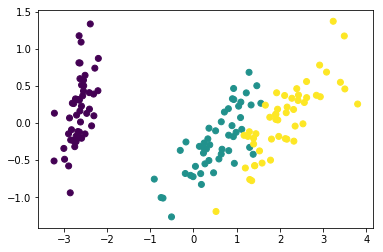

In [11]:
plt.scatter(X[:,0], X[:,1], c=y)

### 準備訓練/測試資料

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

### step 1: 開 SVC 函數學習機

In [14]:
from sklearn.svm import SVC

In [17]:
clf = SVC(gamma='auto')

### step 2: 訓練

In [18]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### step 3: 預測

In [19]:
y_predict = clf.predict(x_test)

In [20]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

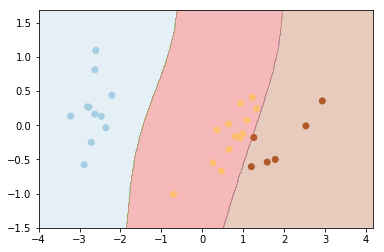

In [21]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='Paired')

## K-Means 自動分類

In [22]:
x = np.random.rand(100, 2)

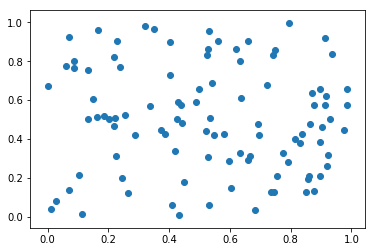

In [23]:
plt.scatter(x[:,0], x[:,1])

### step 1. 打開 K-Means 學習機

In [24]:
from sklearn.cluster import KMeans

In [25]:
clf = KMeans(n_clusters=3)

### step 2. 學習

In [26]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### step 3. 預測

In [27]:
clf.predict(x)

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1], dtype=int32)

In [28]:
clf.labels_

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1], dtype=int32)

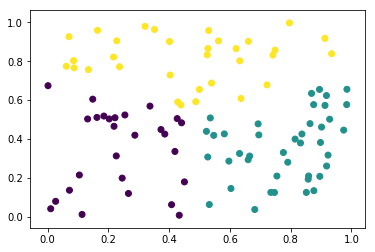

In [29]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

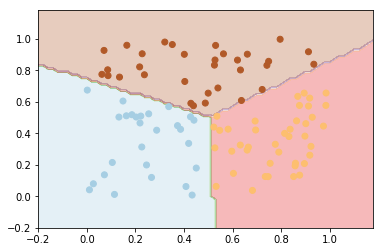

In [30]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

## `make_blobs` 生更像真實世界的數據

In [31]:
from sklearn.datasets.samples_generator import make_blobs

In [32]:
x, y = make_blobs(n_samples=500, centers=3,
                 n_features=2,
                 random_state=0)

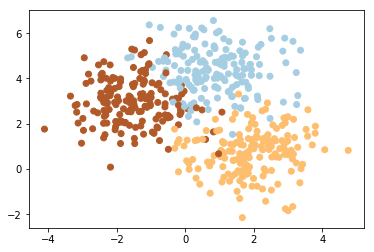

In [33]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired')

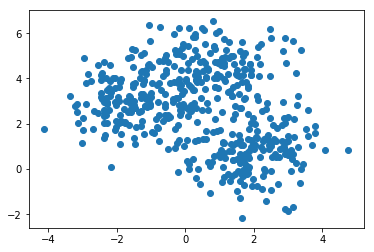

In [34]:
plt.scatter(x[:,0], x[:,1])

### step 1. 打開 K-Means 函數學習機

In [35]:
clf = KMeans(n_clusters=3)

### step 2. 訓練

In [36]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 3. 預測

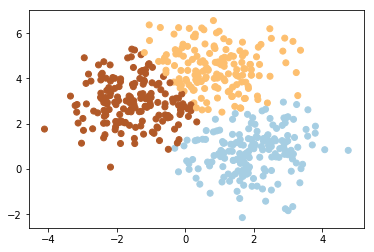

In [37]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

## Mean-Shifts 完全自動分類

### step 1. 打開函數學習機

In [38]:
from sklearn.cluster import MeanShift

In [54]:
clf = MeanShift(bandwidth=0.9)

### step 2. 訓練

In [55]:
clf.fit(x)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

### step 3. 預測

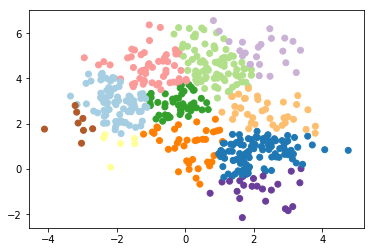

In [56]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

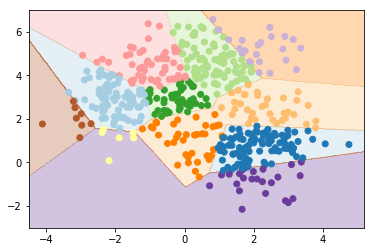

In [57]:
x0 = np.arange(-4.5, 5.2, 0.02)
y0 = np.arange(-3, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

## `cross_val_score`

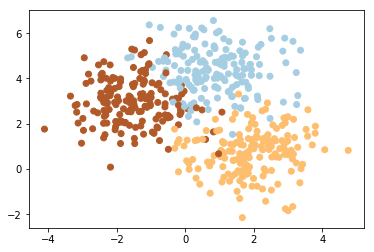

In [58]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired')

In [59]:
from sklearn.model_selection import cross_val_score

### SVC

In [60]:
from sklearn.svm import SVC

In [61]:
clf = SVC(gamma='auto')

In [62]:
scores = cross_val_score(clf, x, y, cv=5)

In [63]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [65]:
scores.max()

0.98989898989899

In [66]:
scores.mean()

0.9420106716554008

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf = DecisionTreeClassifier()

In [70]:
scores = cross_val_score(clf, x, y, cv=5)

In [71]:
scores

array([0.92156863, 0.89108911, 0.94949495, 0.90909091, 0.87878788])

In [73]:
scores.max()

0.9494949494949495

In [75]:
scores.mean()

0.9100062947471217

## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
clf = RandomForestClassifier(n_estimators=100)

In [80]:
scores = cross_val_score(clf, x, y, cv=5)

In [81]:
scores

array([0.92156863, 0.91089109, 0.96969697, 0.88888889, 0.88888889])

In [82]:
scores.max()

0.9696969696969697

In [83]:
scores.mean()

0.9159868928069278

In [84]:
a = '34'

In [85]:
a.zfill(3)

'034'

In [86]:
f'{a:0>3s}'

'034'